# NTDS demo 4: Network models with NetwokX
Hermina Petric Maretic, *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

In this session we will get introduced to NetworkX, explore some of the most common network models, look at their basic properties and compare them.

## Creating graphs using NetworkX
There are many libraries that deal with creation and manipulation of graph data. We will use NetworkX to create basic network models, as they are already implemented in the library. For a full documentation, consult https://networkx.github.io/documentation/stable/tutorial.html

In [11]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Create an Erdos Renyi graph with a 100 vertices, and a probability of connecting each pair of vertices equal to 0.15.

In [12]:
er=nx.erdos_renyi_graph(100,0.15)

We can also see the adjacency matrix of the graph, and manipulate the graph as before.

In [13]:
er_adj = nx.adjacency_matrix(er,range(100))
er_adj = er_adj.todense()

In [14]:
er_adj

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Visualise the matrix:

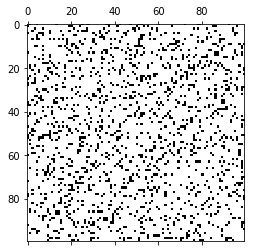

In [15]:
plt.spy(er_adj)

With NetworkX and Matplotlib we can also draw a graph.

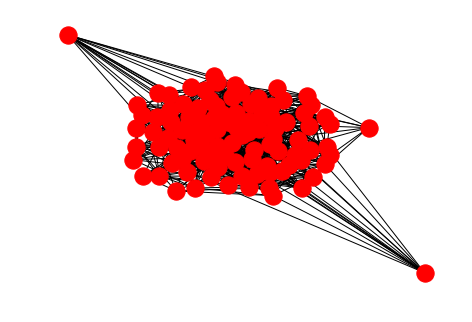

In [16]:
nx.draw(er)

It's easy to add or remove edges, but also nodes. If we add an edge between nodes that don't yet exist, they will be automatically created.

In [17]:
er.add_node(100)

In [18]:
er.nodes()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

Similarly, you can add and remove a collection of nodes or edges, and add and remove one node or edge:
* Adding nodes with:
    - **G.add_node** : One node at a time
    - **G.add_nodes_from** : A container of nodes
* Adding edges with:
    - **G.add_edge**: One edge at a time
    - **G.add_edges_from** : A container of edges
    
    
* Removing nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A container of nodes
* Removing edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges


Add an edge between two non-existant vertices. Remove all nodes up to node 50. Draw the graph after each change.

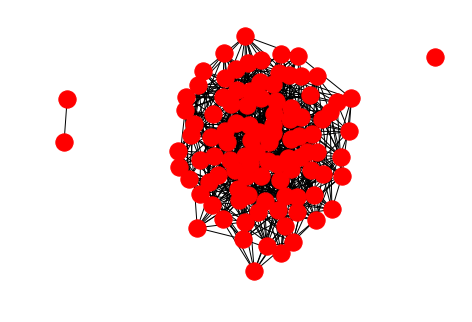

In [19]:
er.add_edge(101,102)
nx.draw(er)

[50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102]

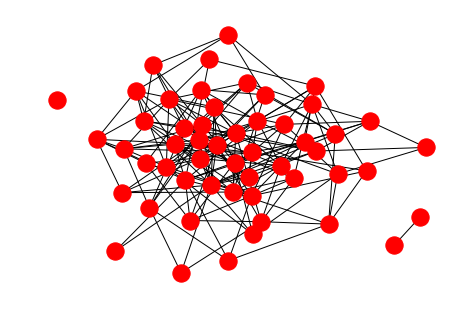

In [20]:
er.remove_nodes_from(range(50))
nx.draw(er)
er.nodes()

Try creating some other known graph models. Create a Barabasi-Albert graph and a Watts-Strogatz graph. Plot them.

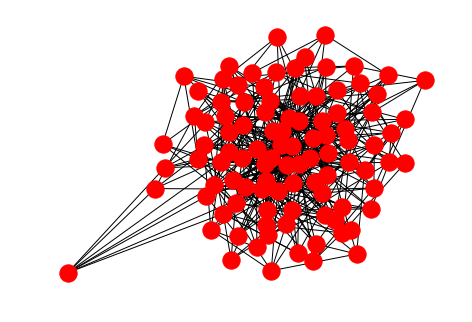

In [21]:
ba=nx.barabasi_albert_graph(100,5)
nx.draw(ba)

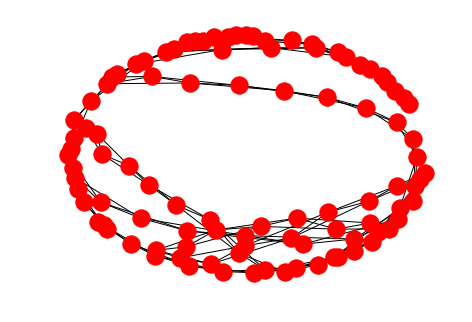

In [22]:
ws=nx.watts_strogatz_graph(100,4,0.001)
nx.draw(ws)

### Network properties with NetworkX

**G.degree()** returns a dictionary of node degrees. If we specify a node, **G.degree()** will return the degree of that node.

Plot a histogram of node degrees. Compare degree distributions of our random networks. Try fitting a Poisson distribution. You can check the number of edges with **G.size()**.

Erdos-Renyi network:

In [23]:
er=nx.erdos_renyi_graph(100,0.15)

In [24]:
def poisson(mu,k):
    return np.exp(-mu) * mu**k * (np.math.factorial(k)**-1)

In [25]:
er.size()

713

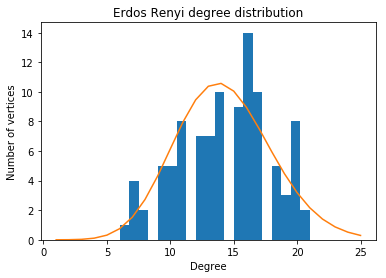

In [26]:
d = er.degree().values()
plt.hist(list(d), bins = 20);
mu = 2*er.size()/100;
k = np.linspace(1,25,25);
deg = [100*poisson(mu,i) for i in k]
plt.plot(k, deg);
plt.ylabel("Number of vertices")
plt.xlabel("Degree")
plt.title("Erdos Renyi degree distribution")
plt.show()

Barabasi-Albert network:

In [27]:
ba.size()

475

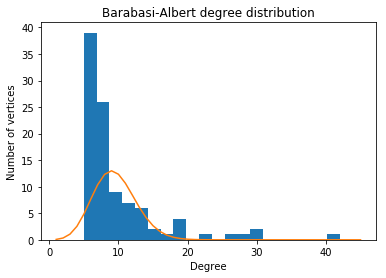

In [28]:
d = ba.degree().values()
plt.hist(list(d), bins = 20);
mu = 2*ba.size()/100;
k = np.linspace(1,45,45);
deg = [100*poisson(mu,i) for i in k]
plt.plot(k, deg);
plt.ylabel("Number of vertices")
plt.xlabel("Degree")
plt.title("Barabasi-Albert degree distribution")
plt.show()

Watts-Strogatz graph:

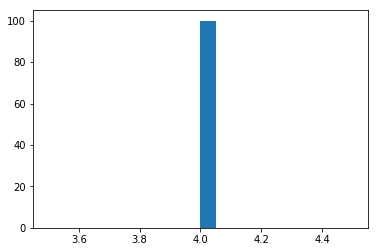

In [29]:
d = ws.degree().values()
plt.hist(list(d), bins = 20);

Why does the distribution look like this? Create a WS model with the same number of edges, but a more "dynamic" distribution.

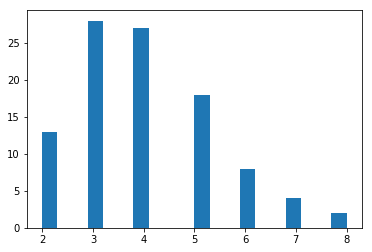

In [30]:
ws_new = nx.watts_strogatz_graph(100,4,0.8)
d = ws_new.degree().values()
plt.hist(list(d), bins = 20);

In [31]:
print(ws.size())
print(ws_new.size())

200
200


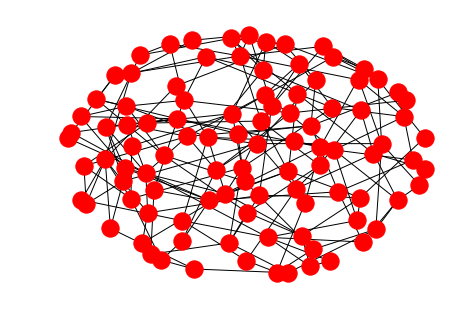

In [32]:
nx.draw(ws_new)

### Random manifold-based network

We can also create a graph on our own. This sort of manifold-based graph is often used in practice when we need a graph representation of data laying on a manifold. Generate 100 two-dimensional data points, both values between 0 and 1. They should come from a uniform random distribution. These will be the coordinates of your nodes. Connect the nodes if their Euclidian distance is smaller than the threshold 0.2. In that case, the weight of the edge should be equal to $w(i,j) = \exp \left(-{\frac {dist(i,j)^{2}}{2\theta ^{2}}}\right)$. For this experiment, set $\theta$ to 0.9. 

In [33]:
def random_gaussian(nodes, theta, threshold):
    adj = np.zeros((len(nodes),len(nodes)))
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            arr = np.linalg.norm(nodes[i]-nodes[j])
            if (arr<threshold):
                d = np.exp(-arr/(2*theta**2))
                adj[i][j] = d
                adj[j][i] = d
    return adj

In [34]:
nodes = np.random.rand(100, 2)

Plot the graph using NetworkX. 
* Hints: 
    - `nx.from_numpy_array(adj)` creates a graph object from an adjacency matrix (in numpy form)
    - `nx.draw(G,pos)` will draw vertices at coordinates specified in pos. Variable pos is a dictionary assigning a pair of coordinates to each node.

In [35]:
adj = random_gaussian(nodes, 0.9, 0.2)

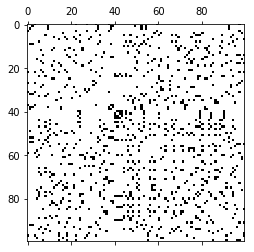

In [36]:
plt.spy(adj)

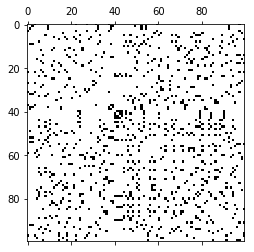

In [37]:
g = nx.from_numpy_matrix(adj)
plt.spy(nx.adjacency_matrix(g).todense())

In [38]:
pos = dict(zip(range(100),nodes))

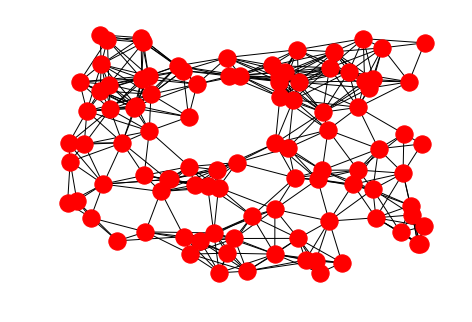

In [39]:
nx.draw(g,pos)

Plot a degree distribution of this graph. What can you say about the distribution?

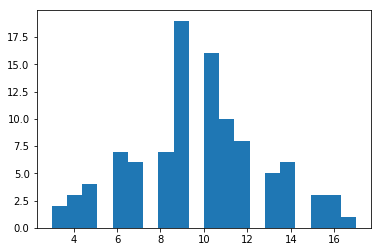

In [40]:
d = g.degree().values()
plt.hist(list(d), bins = 20);